In [15]:
from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image
from torchvision.models import resnet50

import torch
import numpy as np
from PIL import Image
from torchvision.transforms import v2
import matplotlib.pyplot as plt


rgb_img = Image.open('/storage/data/labeled_4312/watermark/[ph]22[ph]_34840.jpg').convert("RGB")

input_tensor = torch.unsqueeze(v2.PILToTensor()(rgb_img).float(),0)

model = resnet50(pretrained=True)
target_layers = [model.layer4[-1]]
cam = GradCAM(model=model, target_layers=target_layers, use_cuda=True)


targets = [ClassifierOutputTarget(281)]
# You can also pass aug_smooth=True and eigen_smooth=True, to apply smoothing.
grayscale_cam = cam(input_tensor=input_tensor, targets=targets)

# In this example grayscale_cam has only one image in the batch:
grayscale_cam = grayscale_cam[0, :]

visualization = show_cam_on_image(np.float32(rgb_img)/255, grayscale_cam, use_rgb=True)

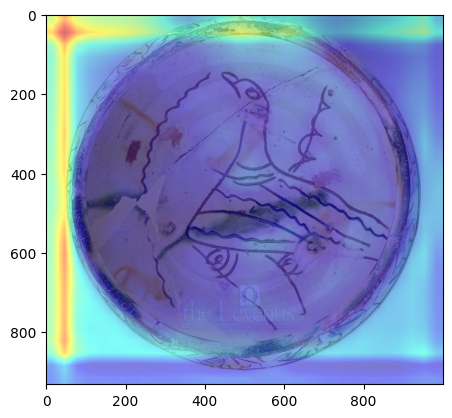

In [18]:

fig,ax = plt.subplots(1,1)
ax.imshow(visualization)

In [16]:
fig,ax

array([[[216, 254, 162],
        [216, 254, 162],
        [216, 254, 162],
        ...,
        [106, 185, 216],
        [106, 185, 216],
        [106, 185, 216]],

       [[215, 254, 161],
        [215, 254, 160],
        [215, 254, 161],
        ...,
        [105, 184, 215],
        [106, 184, 215],
        [106, 184, 215]],

       [[215, 252, 159],
        [215, 253, 158],
        [215, 252, 159],
        ...,
        [105, 183, 214],
        [105, 183, 214],
        [105, 183, 214]],

       ...,

       [[127, 157, 247],
        [127, 157, 247],
        [127, 157, 247],
        ...,
        [124, 149, 244],
        [124, 149, 244],
        [123, 148, 244]],

       [[127, 157, 247],
        [127, 157, 247],
        [127, 157, 247],
        ...,
        [124, 149, 244],
        [124, 149, 244],
        [123, 148, 244]],

       [[127, 157, 247],
        [127, 157, 247],
        [127, 157, 247],
        ...,
        [124, 149, 244],
        [124, 149, 244],
        [123, 148, 244]]